# 6.3 Geographic Visualization 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data Cleaning
#### 3. Plotting a choropleth

### 1. Import data and libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [19]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [20]:
# Import ".json" file for the U.S. 

country_geo = r'/Users/gideon/Downloads/custom.geo.json'

In [21]:
# That's just in case you want to look at the JSON file contents here too:

f = open( r'/Users/gideon/Downloads/custom.geo.json',)

# returns JSON object as a dictionary
data = json.load(f)

# Iterating through the json list
for i in data['features']:
    print(i)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



{'type': 'Feature', 'properties': {'featurecla': 'Admin-0 country', 'scalerank': 0, 'labelrank': 3, 'sovereignt': 'Denmark', 'sov_a3': 'DN1', 'adm0_dif': 1, 'level': 2, 'type': 'Country', 'tlc': '1', 'admin': 'Greenland', 'adm0_a3': 'GRL', 'geou_dif': 0, 'geounit': 'Greenland', 'gu_a3': 'GRL', 'su_dif': 0, 'subunit': 'Greenland', 'su_a3': 'GRL', 'brk_diff': 0, 'name': 'Greenland', 'name_long': 'Greenland', 'brk_a3': 'GRL', 'brk_name': 'Greenland', 'brk_group': None, 'abbrev': 'Grlnd.', 'postal': 'GL', 'formal_en': 'Greenland', 'formal_fr': None, 'name_ciawf': 'Greenland', 'note_adm0': 'Den.', 'note_brk': None, 'name_sort': 'Greenland', 'name_alt': None, 'mapcolor7': 4, 'mapcolor8': 1, 'mapcolor9': 3, 'mapcolor13': 12, 'pop_est': 56225, 'pop_rank': 8, 'pop_year': 2019, 'gdp_md': 3051, 'gdp_year': 2018, 'economy': '2. Developed region: nonG7', 'income_grp': '2. High income: nonOECD', 'fips_10': 'GL', 'iso_a2': 'GL', 'iso_a2_eh': 'GL', 'iso_a3': 'GRL', 'iso_a3_eh': 'GRL', 'iso_n3': '304',

In [22]:
# Define path
path = r'/Users/gideon/Desktop/King County_USA_House sales'

In [23]:
path

'/Users/gideon/Desktop/King County_USA_House sales'

In [24]:
# Upload the dataset of Housesales_in_USA as df_housesales
df_housesales = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Housesales_in_USA.csv'))

### 2. Data Cleaning

In [25]:
df_housesales.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

### The dataset doesnot contain any duplicates or missing values 

### 3. Plotting a Choropleth Map

In [26]:
import plotly.express as px

In [27]:
print(df_housesales.head(10))
print(df_housesales.tail(10))

           id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7 

In [28]:
mapdata = df_housesales[['zipcode', 'price']]
mapdata.head()

zipcode     price
0    98178  221900.0
1    98125  538000.0
2    98028  180000.0
3    98136  604000.0
4    98074  510000.0

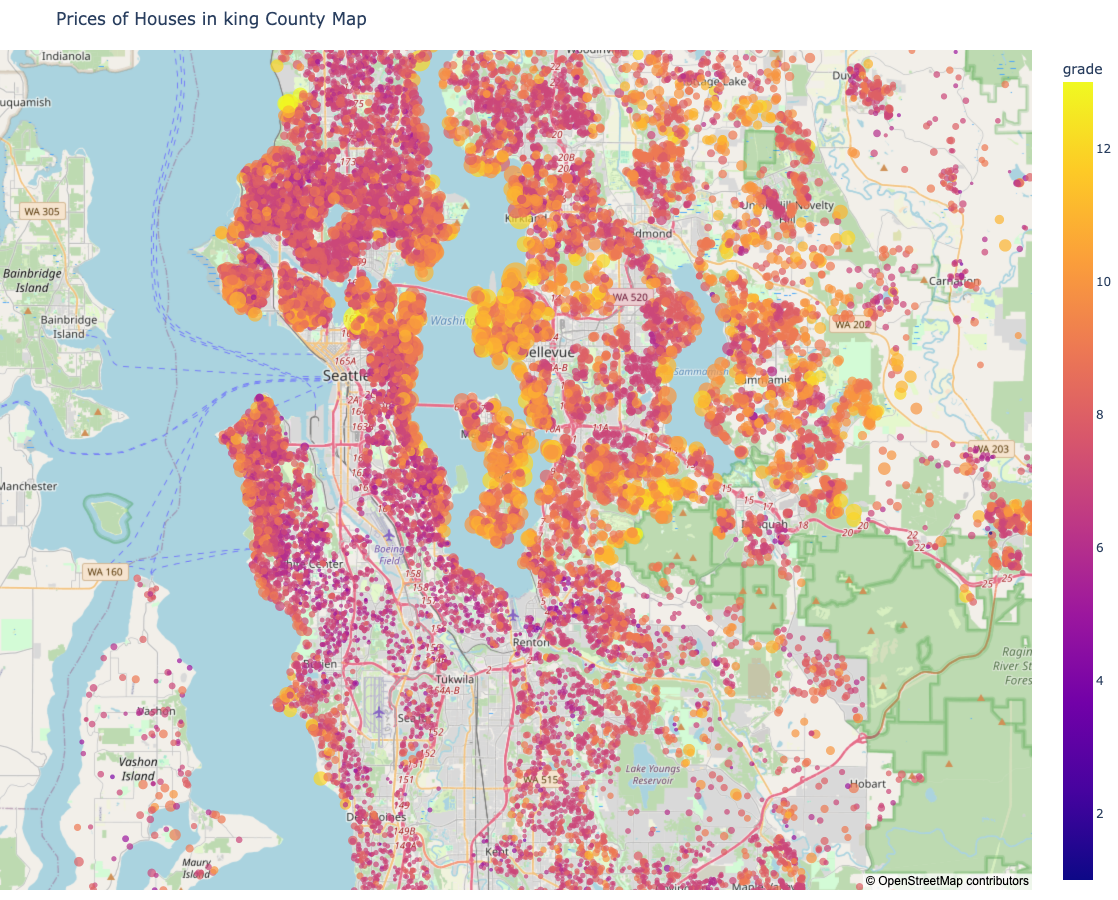

plot compelte.


AttributeError: 'Figure' object has no attribute 'savefig'

In [36]:
fig = px.scatter_mapbox(df_housesales,
                        lon = df_housesales['long'],
                        lat = df_housesales['lat'],
                        zoom = 10,
                        color = df_housesales['grade'],
                        size = df_housesales['price'],
                        width = 1200,
                        height = 900,
                        title = 'Prices of Houses in king County Map'
                       )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
fig.show()
print('plot compelte.')
fig.savefig( "Prices of Houses in king County Map.png")

## END